## Modelleren mbv Python: <br>De val van Felix Baumgartner
![Start van de val](https://images.nrc.nl/PbynCvQDTEME-rmwKWmSh4AXvmA=/1280x/filters:no_upscale()/s3/static.nrc.nl/bvhw/files/2017/12/data23020015-b4bbeb.jpg)

[Het filmpje van de val](https://youtu.be/dYw4meRWGd4)
<br>
In deze modelleer opdracht wordt een model voor de val gemaakt.
<br>
*Opdracht naar Tayo van Boeckel (2019)*

**lees onderstaande goed**
<br>
Het notebook (deze omgeving) voor een model bestaat uit een aantal blokken. Loop de opdrachten (de blokken in het notebook) stap voor stap door.
<br>
Hieronder volgt het eerste code blok. Om verder te gaan moet je telkens eerst tussen de blokhaken op het play (run) knopje drukken. Vervolgens kan je weer verder naar het blok eronder.
<br>
In het code blok hieronder worden eerst enkele noodzakelijke bibliotheken geimporteerd. Alles achter de # in het groen is commentaar en dus uitleg. Druk nu dus op play tussen de blokhaken:
<br>
(Mocht het niet werken, controleer dan of rechtsboven in beeld staat RAM / disk, dat is namelijk goed, of dat er nog staat allocating..., dan even daar op klikken, en even wachten).
<br>

In [ ]:
import numpy as np              #importeer bibliotheek numpy
import matplotlib.pyplot as plt #importeer matplot
%matplotlib inline
#De laatste regel zorgt dat de plots in het notebook komen en niet popuppen.

##Opdracht 0: Model van een vrije val
We maken eerst een eenvoudig model van een vrije val, dus zonder luchtweerstand. Bij dit model zijn de volgende startwaarden nodig: (druk op play/run)

In [ ]:
dt = 0.001

#constanten:
m  = 80 #kg
g  = -9.81 #m/s^2

#startwaarden:
t = 0 #s
a = g #m/s^2
v = 0 #m/s
h = 39045 #m

eindtijd =100 #s


Technische info: <br>Het model wordt hieronder met een 'while' lus gemaakt. Zolang de tijd kleiner is dan de eindtijd blijft de lus doorgaan. We willen later een grafieken voor de snelheid en de plaats als functie van de tijd maken. Hiervoor moeten eerst (lege) lijsten (tabellen) gemaakt worden.
<br>Begrijp je dit bovenstaande niet helemaal, geen ramp.
<br><br>Het model:
<br>Het model wordt in het code blok hieronder heel duidelijk aangegeven door #begin model en #eind model. Dit zijn de eigenlijke modelregels, dit zou je moeten begrijpen, en dit is de plek waar je later dingen kan aanpassen, en nergens anders. Let erop dat alles netjes onder elkaar blijft staan (of evenver inspringt). Bekijk het code blok en druk vervolgens op het run knopje.
<br>



In [ ]:
tijden = [t] # de lijst 'tijden' met een begintijd is gemaakt
snelheden = [v] # en 'snelheden'
hoogten = [h] # en 'plaatsen' ook
versnellingen = [a] # en 'versnellingen' ook

while t < eindtijd:
    # begin model
    t = t + dt
    Fz = m * g
    Fres = Fz
    a= Fres / m
    dv = a * dt
    v = v + dv
    dh = v * dt
    h = h + dh
    if h<=0:  # als ....
      break   # dan stop eindals
    # eind model

    # begin van het vullen van de lijsten
    snelheden.append(v) # voegt een snelheid toe aan de lijst met snelheden.
    hoogten.append(h) # voegt een plaats toe aan een lijst met plaatsen.
    versnellingen.append(a) # voegt een versnelling toe aan een lijst met versnellingen.
    tijden.append(t) # voegt de tijd toe aan een lijst met tijden.
    # eind van het vullen van lijsten

Nu maken we grafieken (plotten). Druk op run om ze te laten verschijnen. Eerst het v-t diagram, vervolgens het h-t diagram en het tenslotte het a-t diagram.

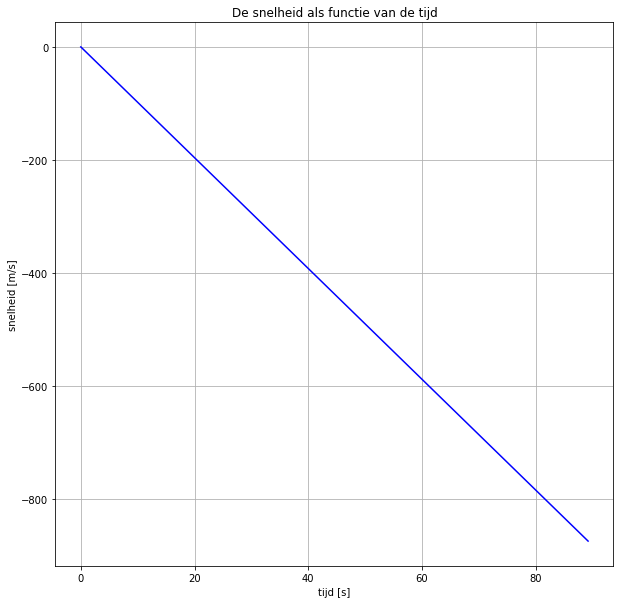

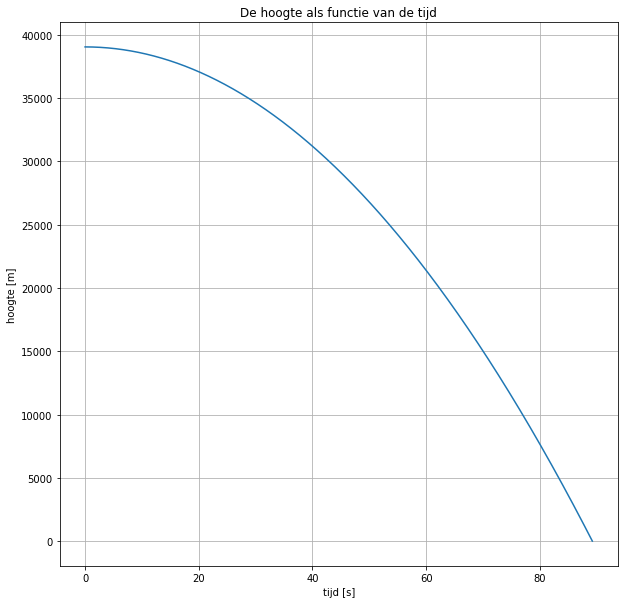

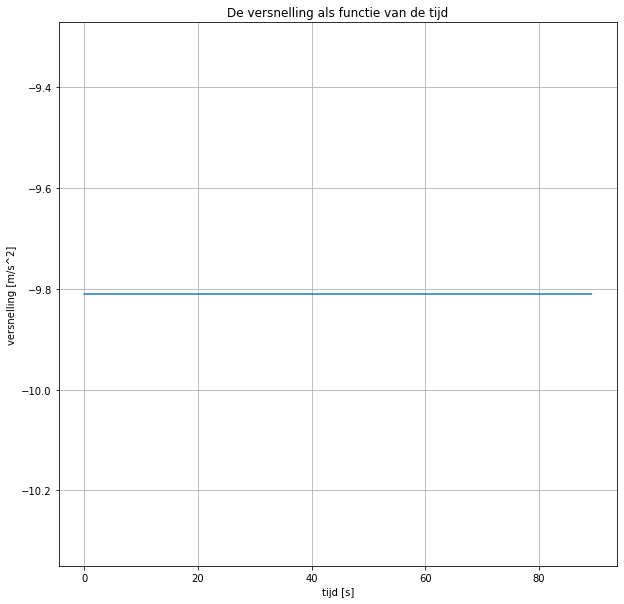

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(tijden, snelheden, 'b')
plt.title('De snelheid als functie van de tijd')
plt.xlabel('tijd [s]')
plt.ylabel('snelheid [m/s]')
plt.grid()

plt.figure(figsize=(10,10))
plt.plot(tijden, hoogten)
plt.title('De hoogte als functie van de tijd')
plt.xlabel('tijd [s]')
plt.ylabel('hoogte [m]')
plt.grid()

plt.figure(figsize=(10,10))
plt.plot(tijden, versnellingen)
plt.title('De versnelling als functie van de tijd')
plt.xlabel('tijd [s]')
plt.ylabel('versnelling [m/s^2]')
plt.grid()

Bekijk de grafieken en het model:
<br>a) Leg uit waarom de snelheid negatief is.

*Type hier je antwoord (dubbelklik):* **omdat g=-9.81 (g = negatief, en deze wordt vermenigvuldigd met de tijd(stap) om de snelheid te berekenen: de snelheid is dus ook negatief**

b) Leg uit waarom de h-t grafiek stopt bij 0m.

*Type hier je antwoord:* **vanwege de stopvoorwaarde "if h<=0:"  als de hoogte kleiner of gelijk is aan nul  "break"   dan stop eindals**

##Opdracht 1: Model van de val met luchtweerstand
Vervolgens ga je nu zelf bedenken hoe je het model aanpast, zodanig dat er wel luchtweerstand is. Pas alleen zaken aan in het model. Voeg ook de de juiste constanten/startwaarden toe. Maak zelf een beredeneerde inschatting van de Cw en het frontale oppervlak van Felix.



In [ ]:
dt = 0.001

#constanten:
m  = 80 #kg
g  = -9.81 #m/s^2
A  = 0.8  #voeg dit toe
cw = 0.85  #voeg dit toe

#startwaarden:
t = 0 #s
a = g #m/s^2
v = 0 #m/s
h = 39045 #m
eindtijd =500 #s    #was 100
T=0


tijden = [t] # de lijst 'tijden' met een begintijd is gemaakt
snelheden = [v] # en 'snelheden'
hoogten = [h] # en 'plaatsen' ook
versnellingen = [a] # en 'versnellingen' ook

while t < eindtijd:
    # begin model
    t = t + dt
    rho = 1.2 # origineel, dit toevoegen hier of bij constanten bovenaan
    Fz = m * g
    Fw = 0.5 * A * cw * rho * v **2 #voeg dit toe
    Fres = Fz + Fw #pas dit -  aan Fz is negatief en Fw is altijd positief door het kwadraat van de snelheid.
    a= Fres / m
    dv = a * dt
    v = v + dv
    dh = v * dt
    h = h + dh

    if h<=0:  # als ....
      break   # stop eindals

    # eind model

    # begin van het vullen van de lijsten
    snelheden.append(v) # voegt een snelheid toe aan de lijst met snelheden.
    hoogten.append(h) # voegt een plaats toe aan een lijst met plaatsen.
    versnellingen.append(a) # voegt een versnelling toe aan een lijst met versnellingen.
    tijden.append(t) # voegt de tijd toe aan een lijst met tijden.
    # eind van het vullen van lijsten

Nu maken we grafieken (plotten). Druk op run om ze te laten verschijnen. Eerst het v-t diagram, vervolgens het h-t diagram en het tenslotte het a-t diagram. De rode kruisjes in het h-t diagram geven de werkelijke meetgegevens aan van de val.

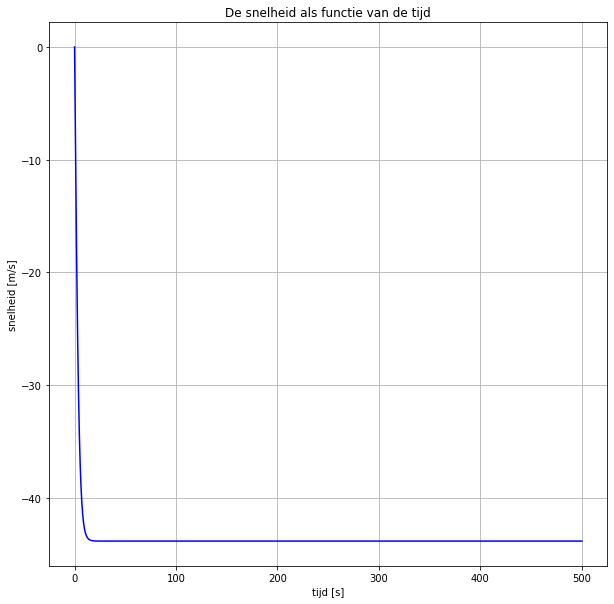

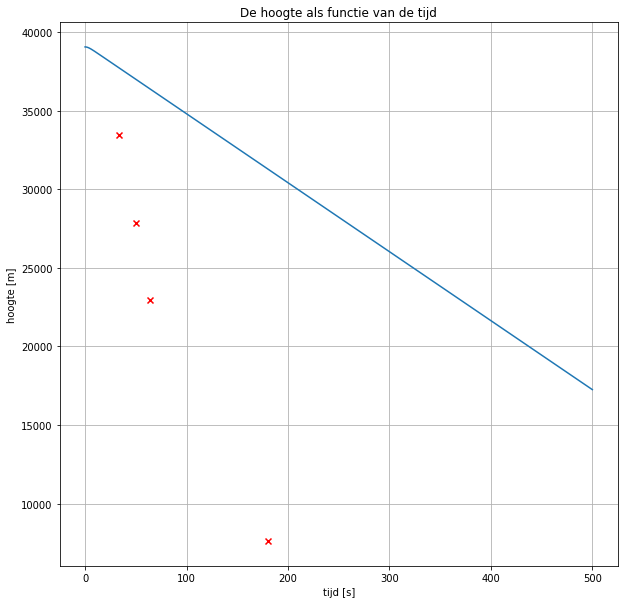

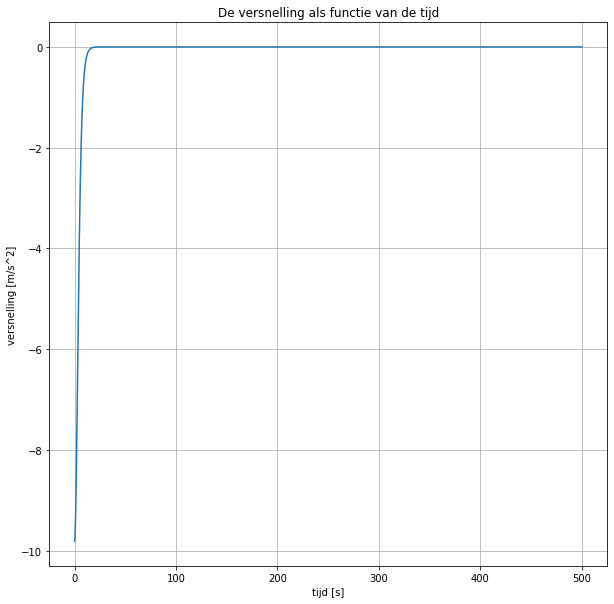

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(tijden, snelheden, 'b')
plt.title('De snelheid als functie van de tijd')
plt.xlabel('tijd [s]')
plt.ylabel('snelheid [m/s]')
plt.grid()

plt.figure(figsize=(10,10))
plt.plot(tijden, hoogten)
plt.scatter([33,50,64,180],[33446,27833,22970,7619],marker='x',c='r')
plt.title('De hoogte als functie van de tijd')
plt.xlabel('tijd [s]')
plt.ylabel('hoogte [m]')
plt.grid()

plt.figure(figsize=(10,10))
plt.plot(tijden, versnellingen)
plt.title('De versnelling als functie van de tijd')
plt.xlabel('tijd [s]')
plt.ylabel('versnelling [m/s^2]')
plt.grid()

##Opdracht 2: Model van de val met variabele luchtdichtheid
In de model dat je hierboven hebt gemaakt ga je ervan uit dat de luchtdichtheid een constante is. In werkelijkheid is de luchtdichtheid echter afhankelijk van de hoogte. Een model wordt gegeven door de volgende formule:

rho = 1.225 * (39045-h)/h

Pas je model hierboven zodanig aan, dat de luchtweerstand afhankelijk is van deze variabele luchtweerstand. Test de wijzigingen aan je model door de grafieken opniew te plotten.



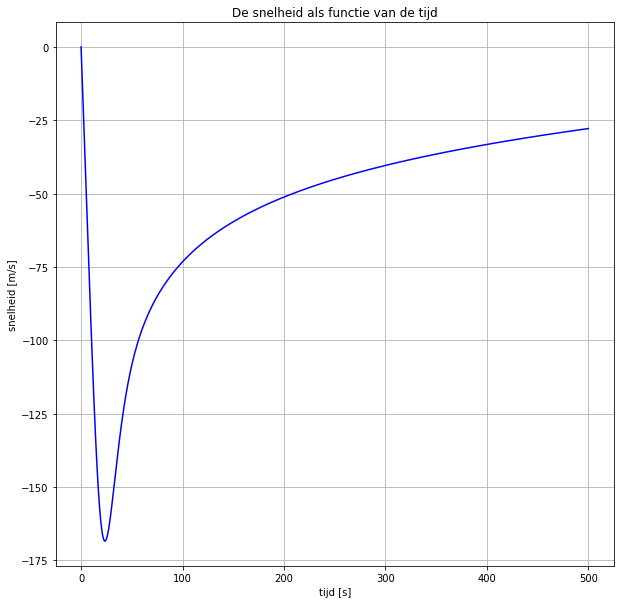

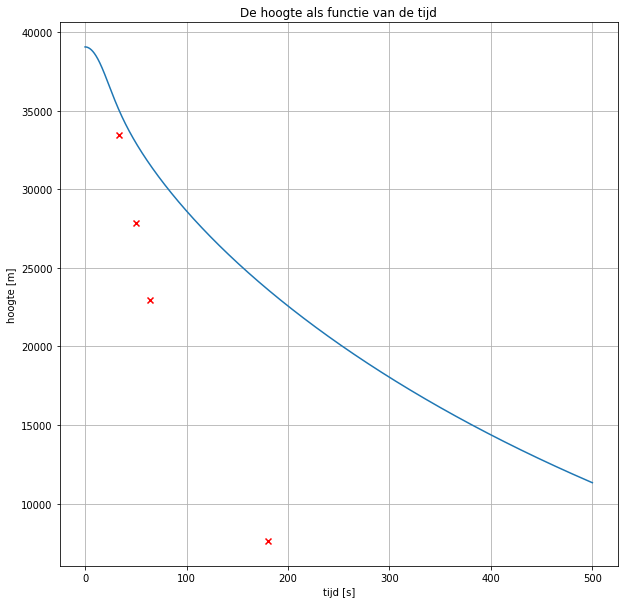

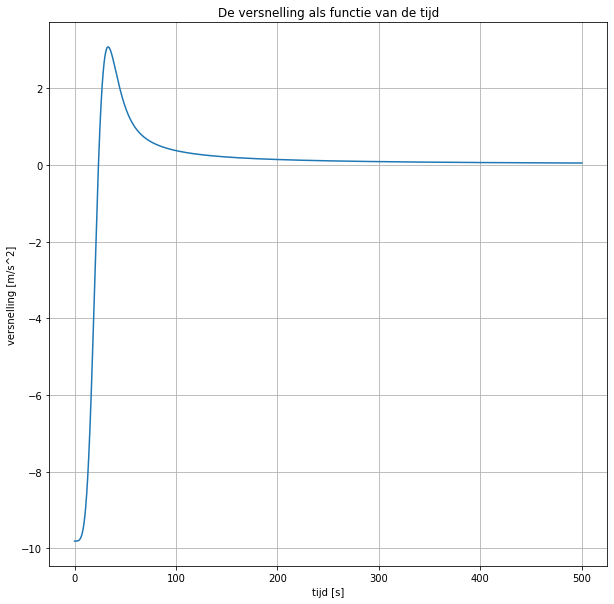

In [ ]:
dt = 0.001

#constanten:
m  = 80 #kg
g  = -9.81 #m/s^2
A  = 0.8  #voeg dit toe
cw = 0.85  #voeg dit toe

#startwaarden:
t = 0 #s
a = g #m/s^2
v = 0 #m/s
h = 39045 #m
eindtijd =500 #s    #was 100
T=0


tijden = [t] # de lijst 'tijden' met een begintijd is gemaakt
snelheden = [v] # en 'snelheden'
hoogten = [h] # en 'plaatsen' ook
versnellingen = [a] # en 'versnellingen' ook

while t < eindtijd:
    # begin model
    t = t + dt
    rho = 1.225 * (39045-h)/h  # deze regel is nu toegevoegd/ aangepast
    Fz = m * g
    Fw = 0.5 * A * cw * rho * v **2
    Fres = Fz + Fw
    a= Fres / m
    dv = a * dt
    v = v + dv
    dh = v * dt
    h = h + dh

    if h<=0:  # als ....
      break   # stop eindals

    # eind model

    # begin van het vullen van de lijsten
    snelheden.append(v) # voegt een snelheid toe aan de lijst met snelheden.
    hoogten.append(h) # voegt een plaats toe aan een lijst met plaatsen.
    versnellingen.append(a) # voegt een versnelling toe aan een lijst met versnellingen.
    tijden.append(t) # voegt de tijd toe aan een lijst met tijden.
    # eind van het vullen van lijsten

plt.figure(figsize=(10,10))
plt.plot(tijden, snelheden, 'b')
plt.title('De snelheid als functie van de tijd')
plt.xlabel('tijd [s]')
plt.ylabel('snelheid [m/s]')
plt.grid()

plt.figure(figsize=(10,10))
plt.plot(tijden, hoogten)
plt.scatter([33,50,64,180],[33446,27833,22970,7619],marker='x',c='r')
plt.title('De hoogte als functie van de tijd')
plt.xlabel('tijd [s]')
plt.ylabel('hoogte [m]')
plt.grid()

plt.figure(figsize=(10,10))
plt.plot(tijden, versnellingen)
plt.title('De versnelling als functie van de tijd')
plt.xlabel('tijd [s]')
plt.ylabel('versnelling [m/s^2]')
plt.grid()


##Opdracht 3: Model van de val met realistische luchtdichtheid
In de formule in de opdracht hierboven wordt een benadering gegeven van de luchtdichtheid, met een afhankelijkheid van de hoogte.
De verandering van de luchtdichtheid kan echter beter worden uitgedrukt als functie van de druk en de temperatuur. Zie Binas tabel 30F. Door dit mee te nemen in het model, wordt een realistischer model verkregen.
In de figuur hieronder is een model van Nasa te zien, waarbij de atmosfeer wordt opgedeeld in drie zones. <br>
![alt text](https://www.grc.nasa.gov/WWW/K-12/airplane/Images/atmosmet.gif)
<br>
(bron: [Nasa](https://www.grc.nasa.gov/WWW/K-12/airplane/atmosmet.html))
<br>
Je gaat nu dit model van Nasa toevoegen aan je model hierboven.
Hieronder volgen de tips hoe je dit doet:
<br>
Tip 1: Je zal deze tabel letterlijk moeten overnemen. In de programmeertaal Python schrijf je “tot de macht” (“^”) als "**" (twee sterretjes). Schrijf getal e als np.e (hij zit in deze bibliotheek).
<br>
Tip 2: De drie lagen programmeer je met behulp van zogenaamde condities:
<br>
Als de hoogte hoger is dan 25.000 m dan bereken je druk en temperatuur zo…<br>
Als de hoogte tussen de 11.000 en 25.000 m is dan bereken je druk en temperatuur zo…<br>
Als de hoogte lager is dan 11.000 m is dan bereken je druk en temperatuur zo…<br>
Tenslotte: met de druk en temperatuur bereken je de luchtdichtheid zo...<br>

Programmeertechnisch schrijf je dit zo op:
```
if h > 25000:
  p = ..
  T = ..
if 11000 < h < 25000:
  p = ..
  T = ..
if h < 11000:
  p = ..
  T = ..

rho = p / (0.2869 * (T + 273.1))
```
Bij iedere conditie is het noodzakelijk om vóór iedere nieuwe regel een witruimte (één tab of één spatie) toe te voegen. Daardoor weet de computer wat bij welke conditie hoort!





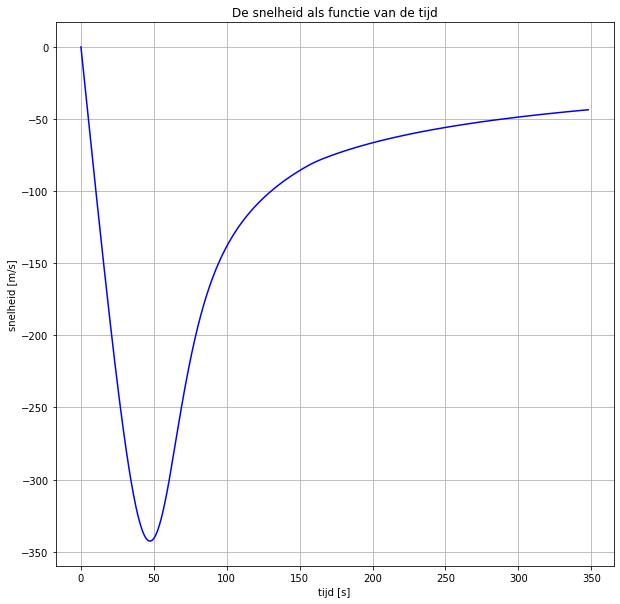

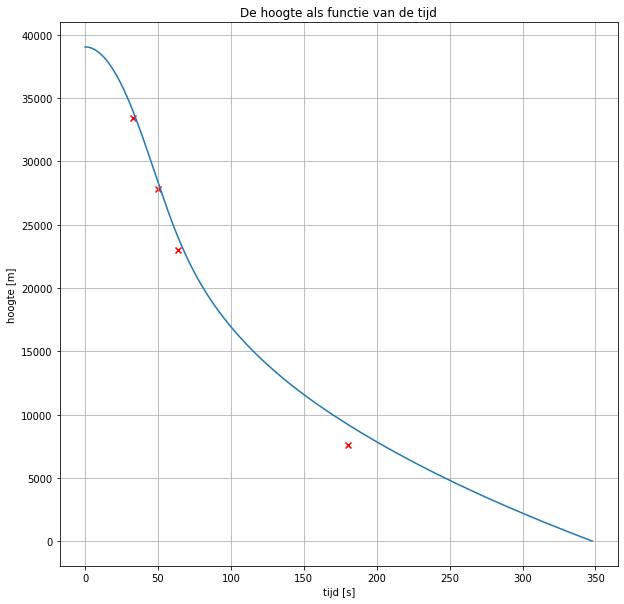

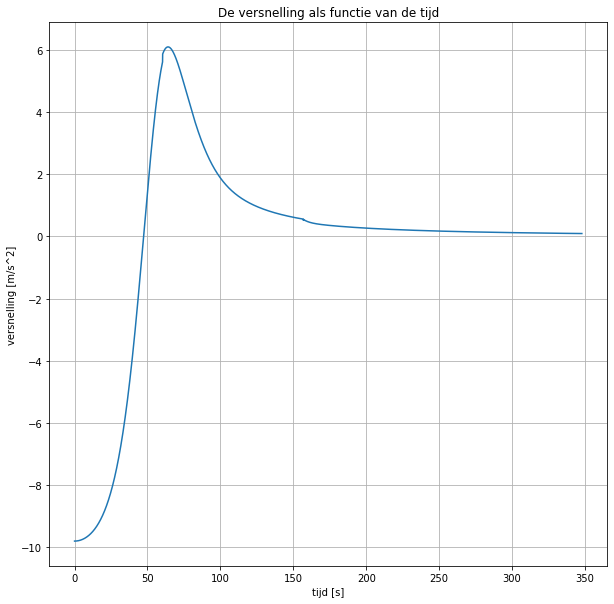

In [ ]:
dt = 0.001

#constanten:
m  = 80 #kg
g  = -9.81 #m/s^2
A  = 0.8  #voeg dit toe
cw = 0.85  #voeg dit toe

#startwaarden:
t = 0 #s
a = g #m/s^2
v = 0 #m/s
h = 39045 #m
eindtijd =500 #s    #was 100
T=0


tijden = [t] # de lijst 'tijden' met een begintijd is gemaakt
snelheden = [v] # en 'snelheden'
hoogten = [h] # en 'plaatsen' ook
versnellingen = [a] # en 'versnellingen' ook

while t < eindtijd:
    # begin model
    t = t + dt
    #rho = 1.2 # origineel (opdracht 1)
    #rho = 1.225 * (39045-h)/h (opdracht2)
    if h > 25000:
      p = 2.488 * ((T+273.1)/216.6)**-11.388
      T = -131.21 + 0.00299*h
    if 11000 < h < 25000:
      p = 22.65*np.e**(1.73-0.000157*h) ### e macht: np.e**
      T = -56.46
    if h < 11000:
      p = 101.29*((T+273.1)/288.08)**5.256
      T = 15.04-.00649*h
    rho = p / (0.2869 * (T + 273.1))


    Fz = m * g
    Fw = 0.5 * A * cw * rho * v **2 #voeg dit toe
    Fres = Fz + Fw #pas dit aan
    a= Fres / m
    dv = a * dt
    v = v + dv
    dh = v * dt
    h = h + dh

    if h<=0:  # als ....
      break   # stop eindals

    # eind model

    # begin van het vullen van de lijsten
    snelheden.append(v) # voegt een snelheid toe aan de lijst met snelheden.
    hoogten.append(h) # voegt een plaats toe aan een lijst met plaatsen.
    versnellingen.append(a) # voegt een versnelling toe aan een lijst met versnellingen.
    tijden.append(t) # voegt de tijd toe aan een lijst met tijden.
    # eind van het vullen van lijsten

plt.figure(figsize=(10,10))
plt.plot(tijden, snelheden, 'b')
plt.title('De snelheid als functie van de tijd')
plt.xlabel('tijd [s]')
plt.ylabel('snelheid [m/s]')
plt.grid()

plt.figure(figsize=(10,10))
plt.plot(tijden, hoogten)
plt.scatter([33,50,64,180],[33446,27833,22970,7619],marker='x',c='r')
plt.title('De hoogte als functie van de tijd')
plt.xlabel('tijd [s]')
plt.ylabel('hoogte [m]')
plt.grid()

plt.figure(figsize=(10,10))
plt.plot(tijden, versnellingen)
plt.title('De versnelling als functie van de tijd')
plt.xlabel('tijd [s]')
plt.ylabel('versnelling [m/s^2]')
plt.grid()


##Opdracht 4: Voorspellen met het model
Nu gaan wij de luchtweerstandscoëfficiënt (cw) nauwkeurig bepalen. Als je in het model invoert dat Felix 100 kg weegt en zijn frontaal oppervlak gemiddeld 0.8 m2 is, dan zal de uitkomst van het model niet precies overeenkomen met de meetgegevens (de rode kruisjes in de grafiek). Dit komt omdat je de cw-coëfficiënt in de eerdere opdracht alleen maar hebt kunnen inschatten.

Pas nu de cw-coëfficiënt zodanig aan dat het model overeenkomt met de meetgegevens. Je zult hiervoor “Trial and Error” moeten toepassen.

a) Welke grootte heeft de cw-coëfficiënt van Felix tijdens zijn sprong? <br>

*Type hier je antwoord (dubbelklik):* **0.85 gaf bij mij aardige resultaten**

b) Er bestaat een [tabel](https://www.engineeringtoolbox.com/drag-coefficient-d_627.html) met bekende luchtweerstandscoëfficiënten. Komt de gevonden waarde uit (a) overeen met wat je zou verwachten op grond van de tabel?

*Type hier je antwoord:* **Ski jumper	1.2 - 1.3 --dus het is een stuk lager volgens dit model, wellicht door een ander pak? en daardoor een andere stroomlijn!**

c) Maakt de grootte van de massa van Felix nog uit voor de duur van zijn val? Vergelijk je antwoord met de beroemde valproef van Galileo Galilei op de toren van Pisa.

*Type hier je antwoord:* **Dat kun je hieronder zien als de massa bv 1000kg is. Het antwoord is ja. Als er geen Fw was, dan maakt de massa niks uit. Maar er is wel Fw. Bij grotere massa is de Fz groter, terwijl de Fw gelijk blijft (niet afhankelijk is van de massa, wel van v uiteraard). De Fw remt de Fz niet genoeg genoeg af, of zoiets, waardoor hij eerder de grond bereikt. De val duurt dus korter.**

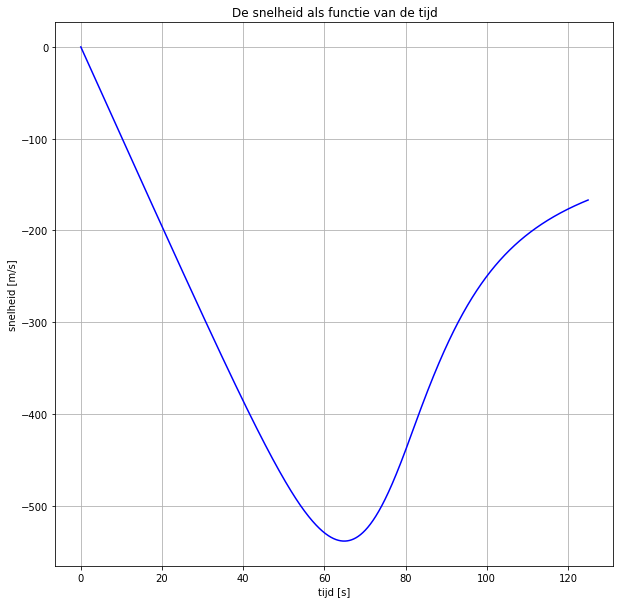

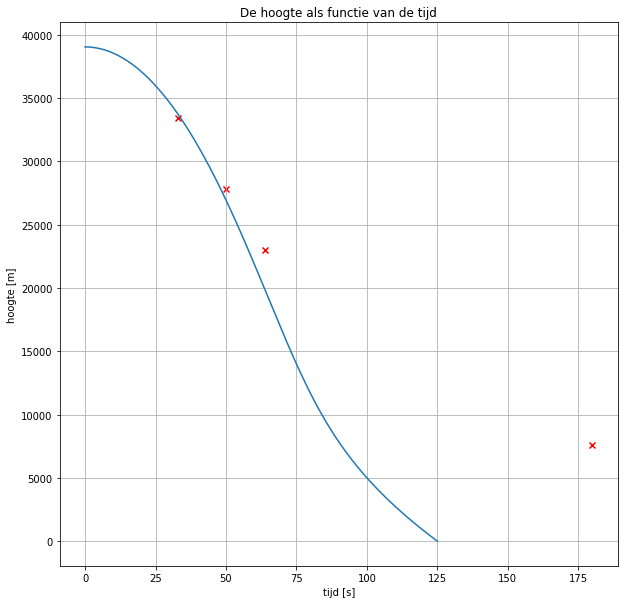

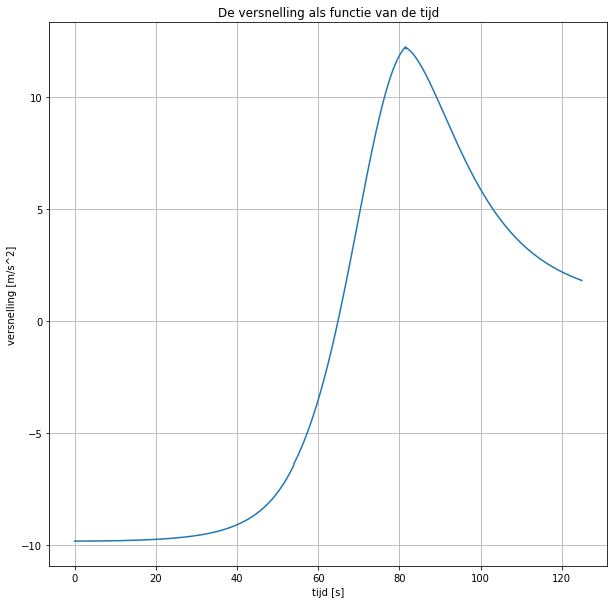

In [ ]:
dt = 0.001

#constanten:
m  = 1000 #kg
g  = -9.81 #m/s^2
A  = 0.8  #voeg dit toe
cw = 0.85  #voeg dit toe

#startwaarden:
t = 0 #s
a = g #m/s^2
v = 0 #m/s
h = 39045 #m
eindtijd =500 #s    #was 100
T=0


tijden = [t] # de lijst 'tijden' met een begintijd is gemaakt
snelheden = [v] # en 'snelheden'
hoogten = [h] # en 'plaatsen' ook
versnellingen = [a] # en 'versnellingen' ook

while t < eindtijd:
    # begin model
    t = t + dt
    #rho = 1.2 # origineel
    #rho = 1.225 * (39045-h)/h
    if h > 25000:
      p = 2.488 * ((T+273.1)/216.6)**-11.388
      T = -131.21 + 0.00299*h
    if 11000 < h < 25000:
      p = 22.65*np.e**(1.73-0.000157*h)
      T = -56.46
    if h < 11000:
      p = 101.29*((T+273.1)/288.08)**5.256
      T = 15.04-.00649*h
    rho = p / (0.2869 * (T + 273.1))


    Fz = m * g
    Fw = 0.5 * A * cw * rho * v **2 #voeg dit toe
    Fres = Fz + Fw #pas dit aan
    a= Fres / m
    dv = a * dt
    v = v + dv
    dh = v * dt
    h = h + dh

    if h<=0:  # als ....
      break   # stop eindals

    # eind model

    # begin van het vullen van de lijsten
    snelheden.append(v) # voegt een snelheid toe aan de lijst met snelheden.
    hoogten.append(h) # voegt een plaats toe aan een lijst met plaatsen.
    versnellingen.append(a) # voegt een versnelling toe aan een lijst met versnellingen.
    tijden.append(t) # voegt de tijd toe aan een lijst met tijden.
    # eind van het vullen van lijsten

plt.figure(figsize=(10,10))
plt.plot(tijden, snelheden, 'b')
plt.title('De snelheid als functie van de tijd')
plt.xlabel('tijd [s]')
plt.ylabel('snelheid [m/s]')
plt.grid()

plt.figure(figsize=(10,10))
plt.plot(tijden, hoogten)
plt.scatter([33,50,64,180],[33446,27833,22970,7619],marker='x',c='r')
plt.title('De hoogte als functie van de tijd')
plt.xlabel('tijd [s]')
plt.ylabel('hoogte [m]')
plt.grid()

plt.figure(figsize=(10,10))
plt.plot(tijden, versnellingen)
plt.title('De versnelling als functie van de tijd')
plt.xlabel('tijd [s]')
plt.ylabel('versnelling [m/s^2]')
plt.grid()


##Opdracht 5: Model van de val met parachute
Bovenstaand model ga je aanvullen met een parachute die opent, zodat Felix niet te pletter valt. Maak het model van de val nog realistischer door ook de opening van de parachute in het model te verwerken.

Op een hoogte van 2450 m opent Felix zijn parachute. Hij landt op een berg van 1360 m hoogte. Het oppervlak van de parachute is 45 m2 en de luchtweerstandscoëfficiënt van de parachute is 1.75.

Voeg modelregels toe die het openen van de parachute beschrijven en bekijk het resultaat.


**In het model hieronder wordt de parachute in een aantal stappen opengevouwen om een realistischer model te krijgen. Dit gebeurd ook in het Champignon model. Als de versnelling op het lichaam van Felix te groot wordt loopt het bovendien niet goed met hem af. Hieronder is die circa 11 m/s2.**

In [ ]:
dt = 0.001

#constanten:
m  = 80 #kg
g  = -9.81 #m/s^2
A  = 0.8  #voeg dit toe
cw = 0.85  #voeg dit toe

#startwaarden:
t = 0 #s
a = g #m/s^2
v = 0 #m/s
h = 39045 #m
eindtijd =500 #s    #was 100
T=0


tijden = [t] # de lijst 'tijden' met een begintijd is gemaakt
snelheden = [v] # en 'snelheden'
hoogten = [h] # en 'plaatsen' ook
versnellingen = [a] # en 'versnellingen' ook

while t < eindtijd:
    # begin model
    t = t + dt
    #rho = 1.2 # origineel
    #rho = 1.225 * (39045-h)/h
    if h > 25000:
      p = 2.488 * ((T+273.1)/216.6)**-11.388
      T = -131.21 + 0.00299*h
    if 11000 < h < 25000:
      p = 22.65*np.e**(1.73-0.000157*h)
      T = -56.46
    if h < 11000:
      p = 101.29*((T+273.1)/288.08)**5.256
      T = 15.04-.00649*h
    rho = p / (0.2869 * (T + 273.1))

    if h < 2450:
      cw = 1.75
      dA = 0.0001
      A = A + dA # eerste keer is A=0.8 zie startwaarden, daarna groeit tot A=45
      if A >= 45:
        A=45

    Fz = m * g
    Fw = 0.5 * A * cw * rho * v **2 #voeg dit toe
    Fres = Fz + Fw #pas dit aan
    a= Fres / m
    dv = a * dt
    v = v + dv
    dh = v * dt
    h = h + dh

    if h<=1360:  # als ....
      break   # stop eindals

    # eind model

    # begin van het vullen van de lijsten
    snelheden.append(v) # voegt een snelheid toe aan de lijst met snelheden.
    hoogten.append(h) # voegt een plaats toe aan een lijst met plaatsen.
    versnellingen.append(a) # voegt een versnelling toe aan een lijst met versnellingen.
    tijden.append(t) # voegt de tijd toe aan een lijst met tijden.
    # eind van het vullen van lijsten

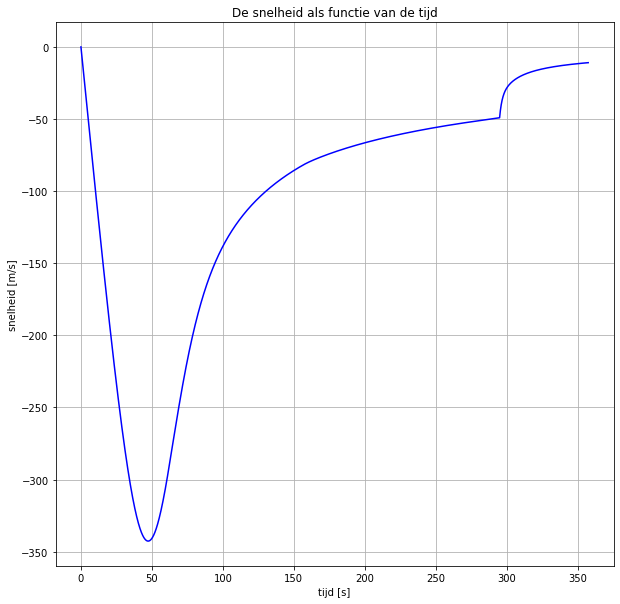

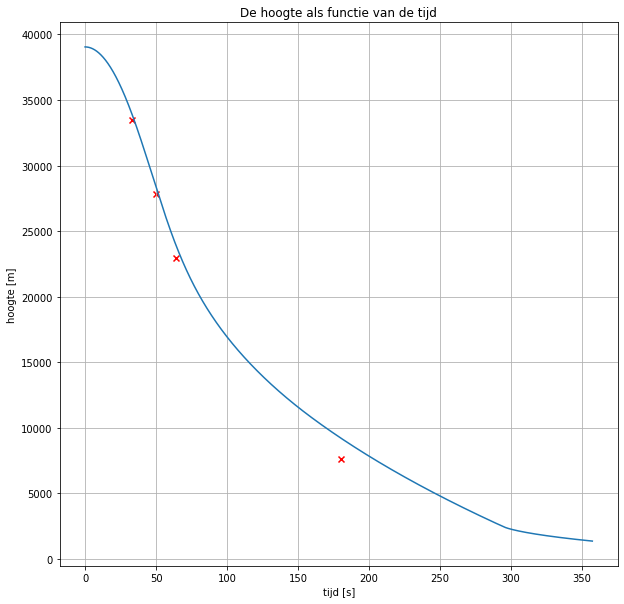

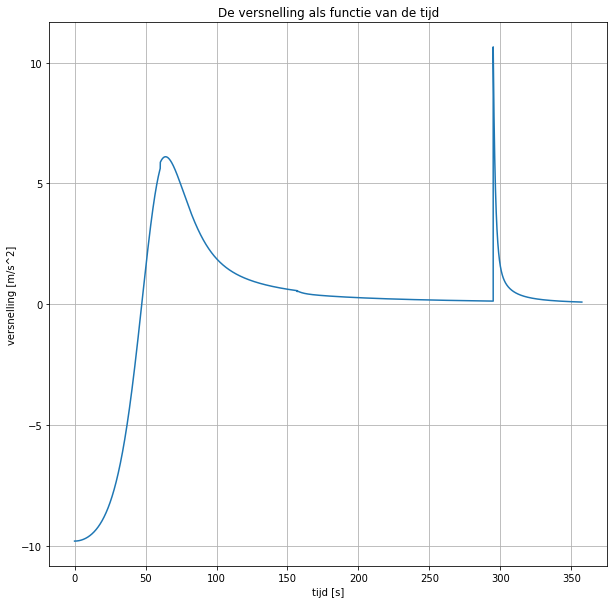

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(tijden, snelheden, 'b')
plt.title('De snelheid als functie van de tijd')
plt.xlabel('tijd [s]')
plt.ylabel('snelheid [m/s]')
plt.grid()

plt.figure(figsize=(10,10))
plt.plot(tijden, hoogten)
plt.scatter([33,50,64,180],[33446,27833,22970,7619],marker='x',c='r')
plt.title('De hoogte als functie van de tijd')
plt.xlabel('tijd [s]')
plt.ylabel('hoogte [m]')
plt.grid()

plt.figure(figsize=(10,10))
plt.plot(tijden, versnellingen)
plt.title('De versnelling als functie van de tijd')
plt.xlabel('tijd [s]')
plt.ylabel('versnelling [m/s^2]')
plt.grid()